In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('supply_chain_data.csv')
df.shape

(100, 24)

In [4]:
df.head().transpose()

,0,1,2,3,4
Product type,haircare,skincare,haircare,skincare,skincare
SKU,SKU0,SKU1,SKU2,SKU3,SKU4
Price,69.808006,14.843523,11.319683,61.163343,4.805496
Availability,55,95,34,68,26
Number of products sold,802,736,8,83,871
Revenue generated,8661.996792,7460.900065,9577.749626,7766.836426,2686.505152
Customer demographics,Non-binary,Female,Unknown,Non-binary,Non-binary
Stock levels,58,53,1,23,5
Lead times,7,30,10,13,3
Order quantities,96,37,88,59,56


In [5]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [6]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows: ", df.duplicated().sum())

Missing Values:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64
Duplicate Rows:  0


In [7]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object


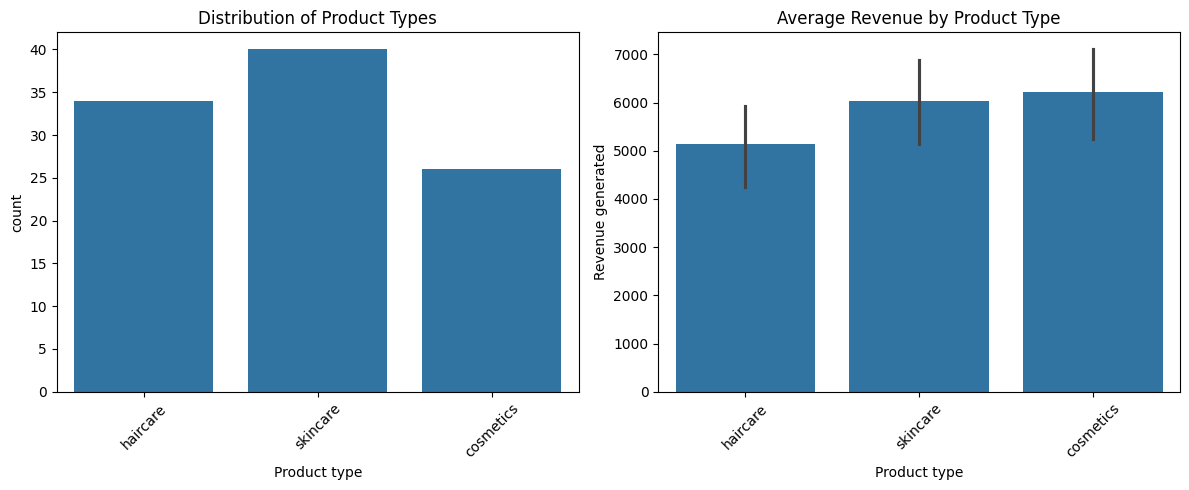

In [8]:
# Create a single figure with two subplots
plt.figure(figsize=(12, 5))

# First subplot - Product type distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(data=df, x='Product type')
plt.title('Distribution of Product Types')
plt.xticks(rotation=45)

# Second subplot - Average revenue by product type
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=df, x='Product type', y='Revenue generated')
plt.title('Average Revenue by Product Type')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

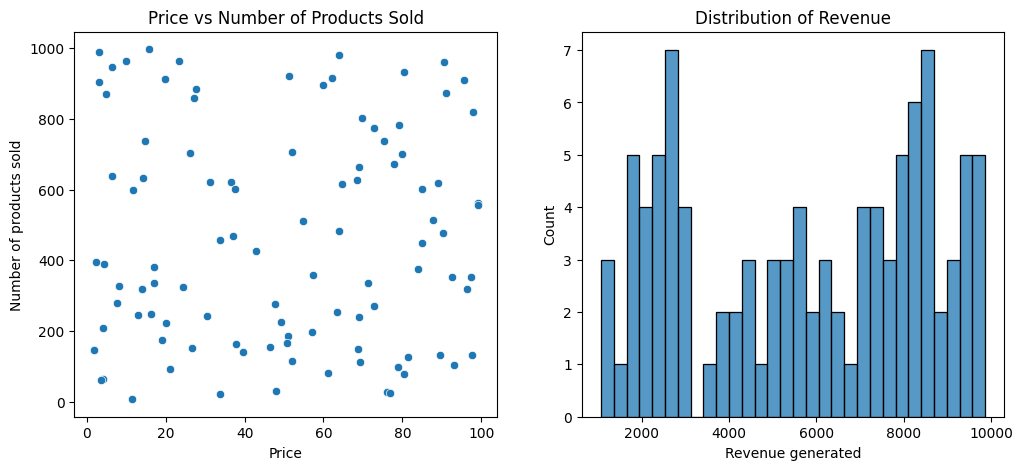

In [9]:
# Correlation between price and number of products sold
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Price', y='Number of products sold')
plt.title('Price vs Number of Products Sold')

# Distribution of revenue
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Revenue generated', bins=30)
plt.title('Distribution of Revenue')
plt.show()

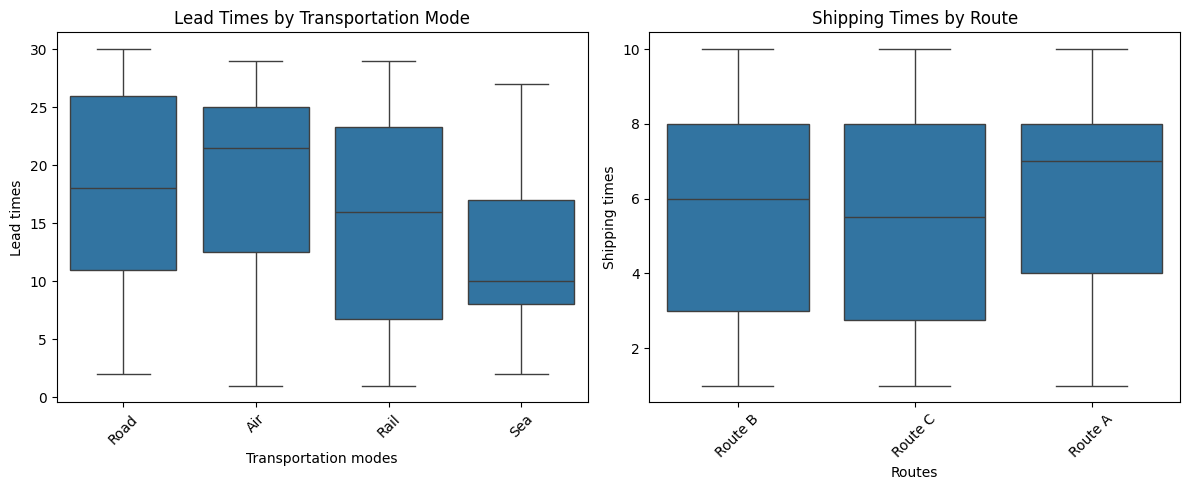

In [10]:
# Lead times analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Transportation modes', y='Lead times')
plt.title('Lead Times by Transportation Mode')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Routes', y='Shipping times')
plt.title('Shipping Times by Route')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

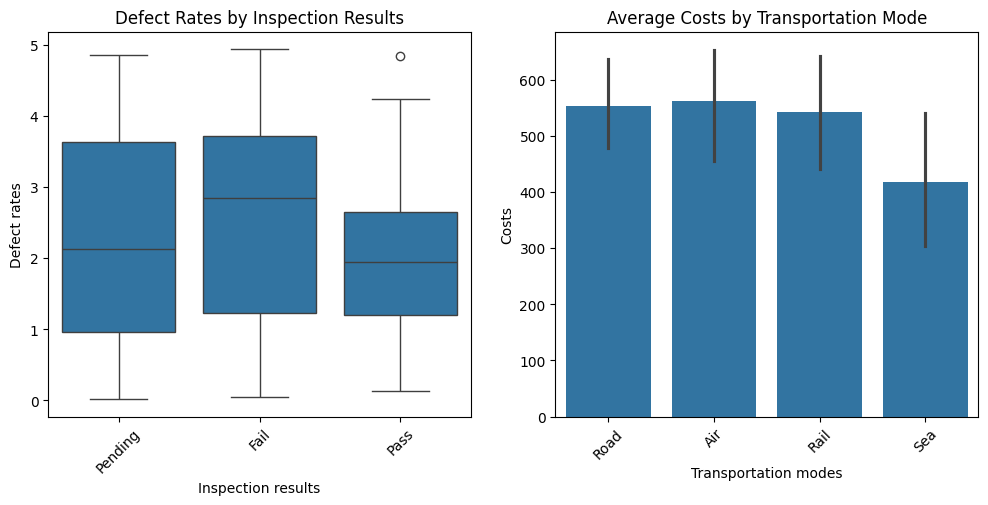

In [11]:
# Defect rates by inspection results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Inspection results', y='Defect rates')
plt.title('Defect Rates by Inspection Results')
plt.xticks(rotation=45)

# Cost analysis by transportation mode
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Transportation modes', y='Costs')
plt.title('Average Costs by Transportation Mode')
plt.xticks(rotation=45)
plt.show()

### Customer segmentation analysis

In [12]:
revenue_avg_by_demo_prod = df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].mean().reset_index()
revenue_sum_by_demo_prod = df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].sum().reset_index()

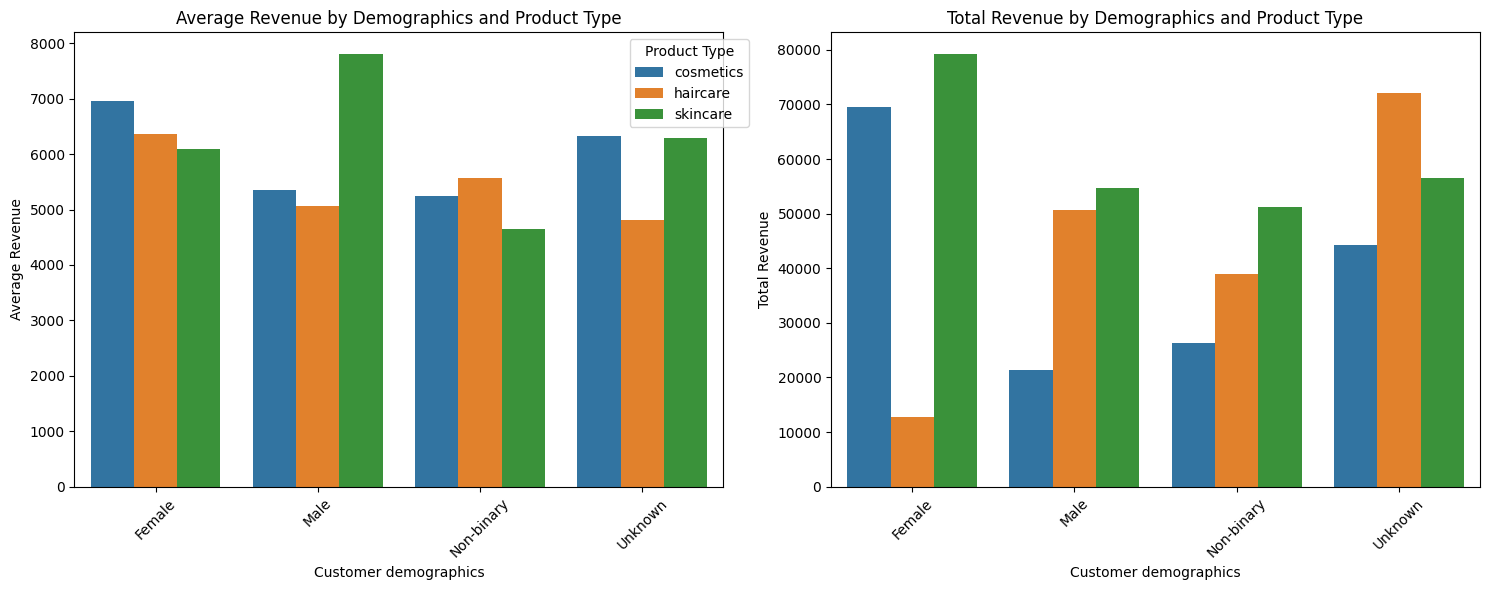

In [13]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# First subplot - Average Revenue
plt.subplot(1, 2, 1)
sns.barplot(data=revenue_avg_by_demo_prod, 
           x='Customer demographics', 
           y='Revenue generated', 
           hue='Product type')
plt.title('Average Revenue by Demographics and Product Type')
plt.xticks(rotation=45)
plt.ylabel('Average Revenue')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1))

# Second subplot - Total Revenue
plt.subplot(1, 2, 2)
sns.barplot(data=revenue_sum_by_demo_prod, 
           x='Customer demographics', 
           y='Revenue generated', 
           hue='Product type')
plt.title('Total Revenue by Demographics and Product Type')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.legend().remove()  # Remove legend from second subplot

# Adjust layout
plt.tight_layout()
plt.show()

### Lead times optimization analysis

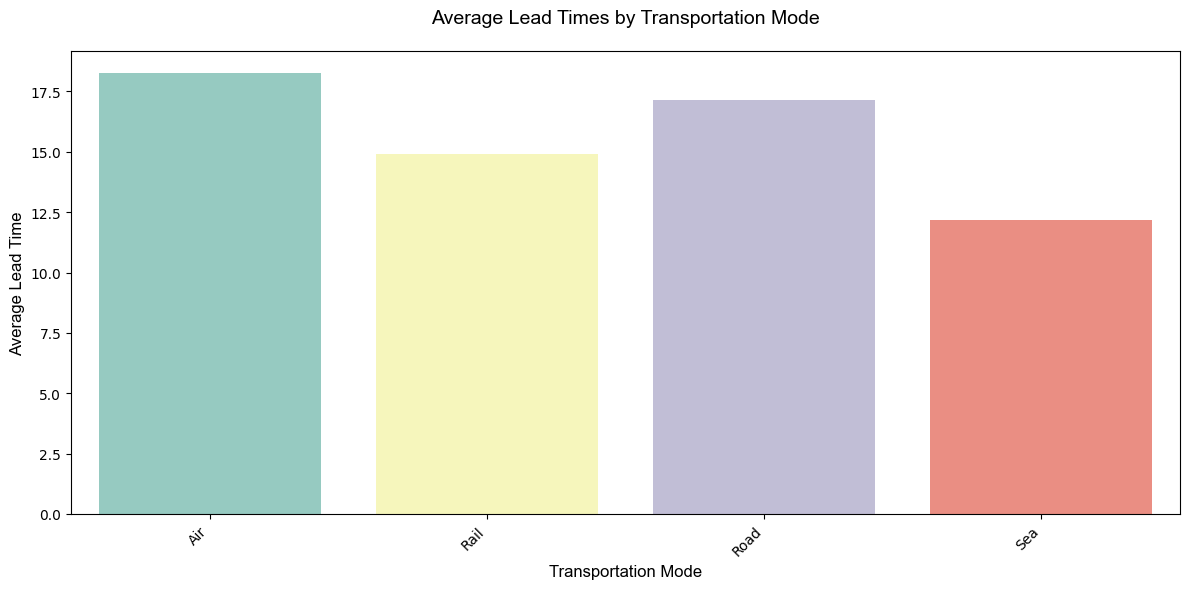

In [14]:
# Calculate average lead times by transportation mode
avg_lead_times_transport = df.groupby(['Transportation modes'])['Lead times'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Create bar plot using Seaborn
sns.barplot(data=avg_lead_times_transport, 
           x='Transportation modes', 
           y='Lead times',
           palette='Set3')  # Using same color palette as original

# Customize the plot
plt.title('Average Lead Times by Transportation Mode', pad=20, fontsize=14, fontfamily='Arial')
plt.xlabel('Transportation Mode', fontsize=12, fontfamily='Arial')
plt.ylabel('Average Lead Time', fontsize=12, fontfamily='Arial')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
best_transportation_mode = avg_lead_times_transport.loc[avg_lead_times_transport['Lead times'].idxmin()]

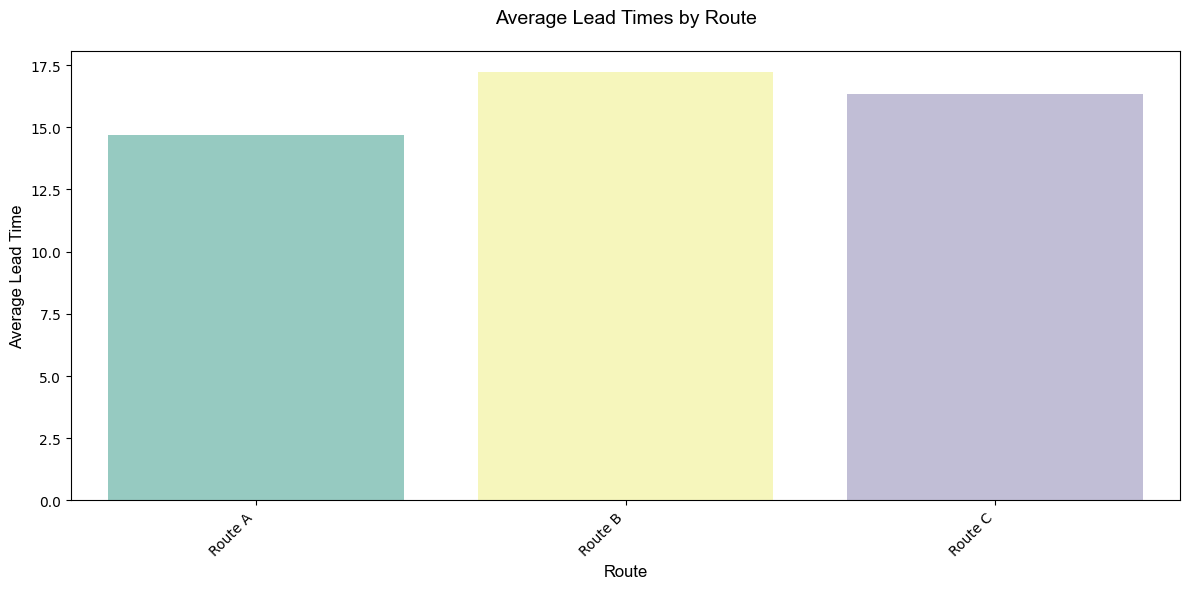

In [16]:
# Calculate average lead times by route
avg_lead_times_route = df.groupby(['Routes'])['Lead times'].mean().reset_index()

# Create the plot 
plt.figure(figsize=(12, 6))

# Create bar plot using Seaborn
sns.barplot(data=avg_lead_times_route,
            x='Routes',
            y='Lead times',
            palette='Set3')  # Using same color palette as original

# Customize the plot
plt.title('Average Lead Times by Route', pad=20, fontsize=14, fontfamily='Arial')
plt.xlabel('Route', fontsize=12, fontfamily='Arial')
plt.ylabel('Average Lead Time', fontsize=12, fontfamily='Arial')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
best_route = avg_lead_times_route.loc[avg_lead_times_route['Lead times'].idxmin()]

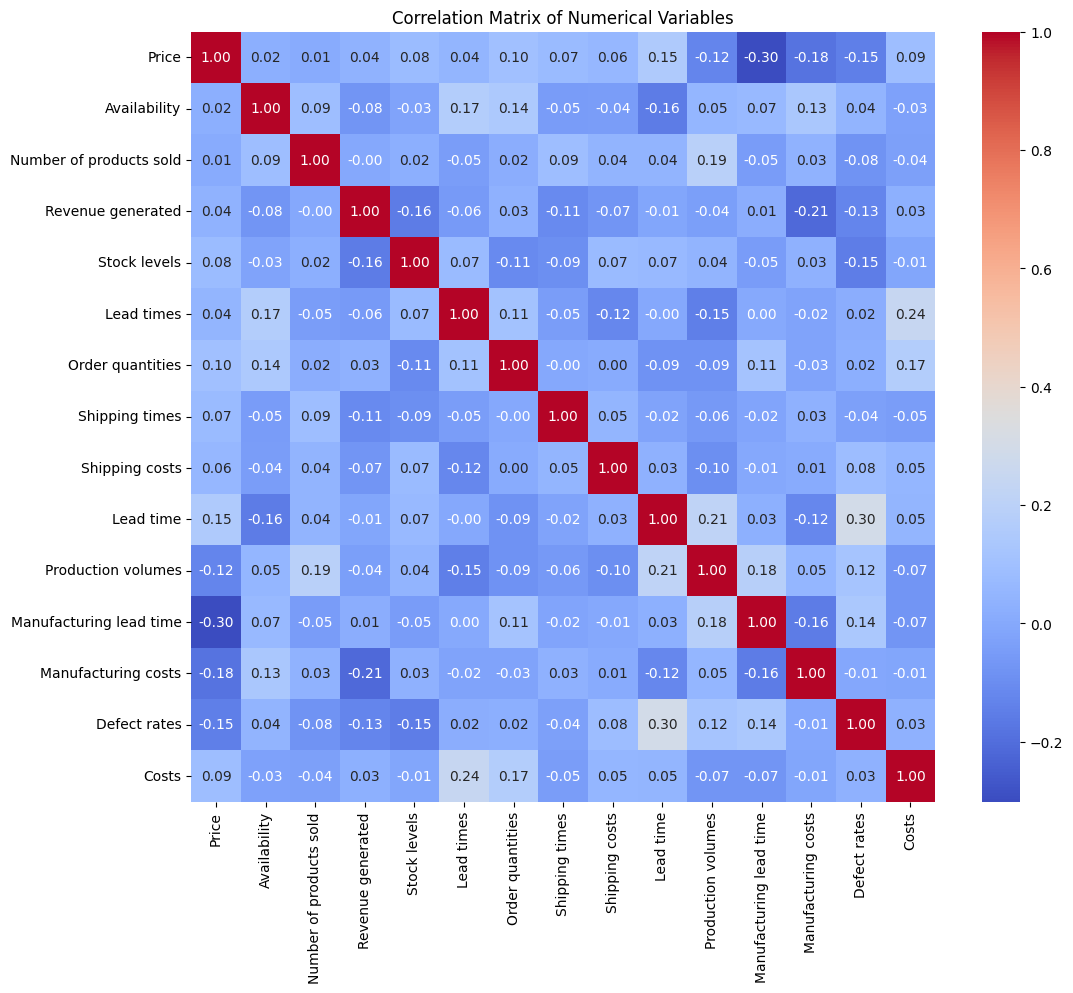

In [18]:
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [22]:
# Key metrics summary
print("Key Supply Chain Metrics:\n")
print(f"Average Revenue: ${df['Revenue generated'].mean():.2f}")
print(f"Average Lead Time: {df['Lead times'].mean():.2f} days")
print(f"Average Defect Rate: {df['Defect rates'].mean():.2f}%")
print(f"Most Common Transportation Mode: {df['Transportation modes'].mode()[0]}")
print(f"Most Common Route: {df['Routes'].mode()[0]}")
print(f"Average Shipping Cost: ${df['Shipping costs'].mean():.2f}")
print(f"Average Shipping Time: {df['Shipping times'].mean():.2f} days")

print(f"Best transportation mode:{best_transportation_mode[0]} - lead time:{round(best_transportation_mode[1], 2)}")
print(f"Best route(less avg lead time):{best_route[0]} - lead time:{round(best_route[1], 2)}")

Key Supply Chain Metrics:

Average Revenue: $5776.05
Average Lead Time: 15.96 days
Average Defect Rate: 2.28%
Most Common Transportation Mode: Road
Most Common Route: Route A
Average Shipping Cost: $5.55
Average Shipping Time: 5.75 days
Best transportation mode:Sea - lead time:12.18
Best route(less avg lead time):Route A - lead time:14.7
